In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


# Import Libraries --> Data Inspection --> Data Cleaning ---> Summary Statistics

1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Data Inspections

In [3]:
avocado = pd.read_csv('/kaggle/input/avocado-prices/avocado.csv')

In [4]:
avocado.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [5]:
avocado.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


3. Data Cleaning

In [7]:
del avocado['Unnamed: 0']

Delete column unamed:0

In [11]:
#check missing values

missing_values = avocado.isnull().sum()

In [12]:
missing_values

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No Missing Values in Dataset

In [13]:
# Check for duplicate rows
duplicate_rows = avocado[avocado.duplicated()]

In [14]:
duplicate_rows

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


No Duplicates values in rows

Summary Statistics

In [15]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [16]:
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [19]:
# check summary statistic for non numerical value features

avocado.describe(include=['object'])

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2015-12-27,conventional,Albany
freq,108,9126,338


Q1 - Was the Avocadopocalypse of 2017 real?

In [25]:
# Group the data by year and calculate the mean of the average price
avocado_yearly_avg_price = avocado.groupby('year')['AveragePrice'].mean().reset_index()

# Display the yearly average price to investigate the Avocadopocalypse of 2017
avocado_yearly_avg_price

,year,AveragePrice
0,2015,1.375590
1,2016,1.338640
2,2017,1.515128
3,2018,1.347531


Q2 - In which cities can millenials have their avocado toast AND buy a home?

In [26]:
# Calculate the average avocado price per city
avg_price_per_city = avocado.groupby('region')['AveragePrice'].mean().reset_index()

# Sort the cities by average price in ascending order to see the cities with the lowest average prices
avg_price_per_city_sorted = avg_price_per_city.sort_values(by='AveragePrice').reset_index(drop=True)

# Display the cities with the lowest average prices
avg_price_per_city_sorted

,region,AveragePrice
0,Houston,1.047929
1,DallasFtWorth,1.085592
2,SouthCentral,1.101243
3,CincinnatiDayton,1.209201
4,Nashville,1.212101
5,LosAngeles,1.216006
6,Denver,1.218580
7,PhoenixTucson,1.224438
8,Roanoke,1.247929
9,Columbus,1.252781


Calculate all the distribution for all columns

In [27]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [29]:
avocado['Date'].value_counts()

Date
2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: count, Length: 169, dtype: int64

In [30]:
avocado['AveragePrice'].value_counts()

AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64

In [31]:
avocado['Total Volume'].value_counts()

Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: count, Length: 18237, dtype: int64

In [32]:
avocado['4046'].value_counts()

4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64

In [33]:
avocado['4225'].value_counts()

4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: count, Length: 18103, dtype: int64

In [35]:
avocado['4225'].value_counts()

4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: count, Length: 18103, dtype: int64

In [36]:
avocado['Total Bags'].value_counts()

Total Bags
0.00         15
990.00        5
300.00        5
550.00        4
266.67        4
             ..
90196.05      1
130858.02     1
510679.10     1
84522.00      1
12014.15      1
Name: count, Length: 18097, dtype: int64

In [37]:
avocado['Small Bags'].value_counts()

Small Bags
0.00        159
203.33       11
223.33       10
533.33       10
123.33        8
           ... 
14002.00      1
32441.00      1
29560.96      1
22077.20      1
11988.14      1
Name: count, Length: 17321, dtype: int64

In [38]:
avocado['Large Bags'].value_counts()

Large Bags
0.00          2370
3.33           187
6.67            78
10.00           47
4.44            38
              ... 
2528089.14       1
2287449.76       1
731388.25        1
673464.14        1
26.01            1
Name: count, Length: 15082, dtype: int64

In [39]:
avocado['XLarge Bags'].value_counts()

XLarge Bags
0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: count, Length: 5588, dtype: int64

In [40]:
avocado['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [41]:
avocado['year'].value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

In [42]:
avocado['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

Calculate Average Price and Date in summary statistics

# Average Price

In [43]:
min_avocadoreview = avocado['AveragePrice'].min()
print("Avocado Min Average Price:", min_avocadoreview)

Avocado Min Average Price: 0.44


In [44]:
mean_avocadoreview = avocado['AveragePrice'].mean()
print("Avocado Mean Average Price:", mean_avocadoreview)

Avocado Mean Average Price: 1.405978409775878


In [45]:
median_avocadoreview = avocado['AveragePrice'].median()
print("Avocado Median Average Price:", median_avocadoreview)

Avocado Median Average Price: 1.37


In [46]:
max_avocadoreview = avocado['AveragePrice'].max()
print("Avocado Max Average Price:", max_avocadoreview)

Avocado Max Average Price: 3.25


In [47]:
std_avocadoreview = avocado['AveragePrice'].std()
print("Avocado Standard Average Price:", std_avocadoreview)

Avocado Standard Average Price: 0.40267655549555065


Data Visualization

In [48]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Visualize for first 50 rows

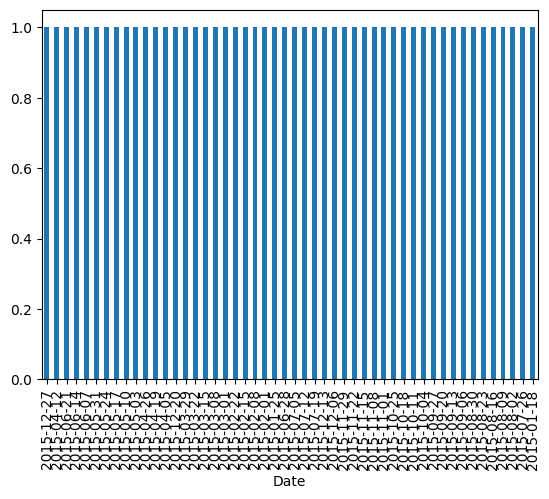

In [49]:
avocado['Date'].head(50).value_counts().plot(kind='bar')
plt.show()

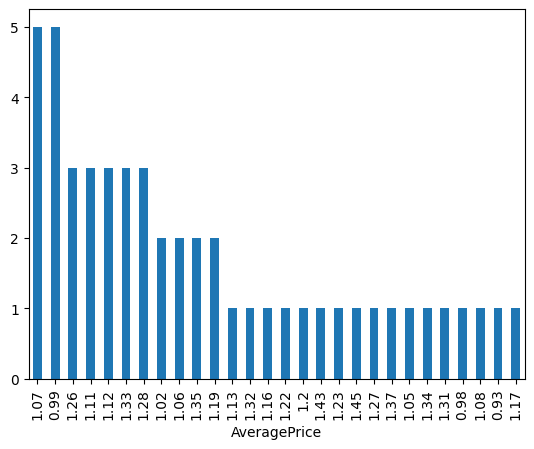

In [50]:
avocado['AveragePrice'].head(50).value_counts().plot(kind='bar')
plt.show()

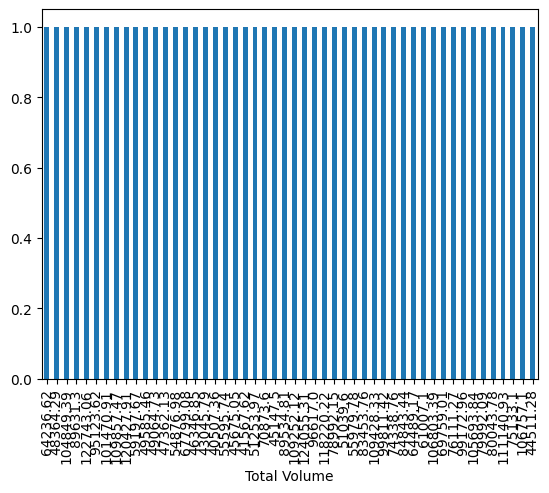

In [51]:
avocado['Total Volume'].head(50).value_counts().plot(kind='bar')
plt.show()

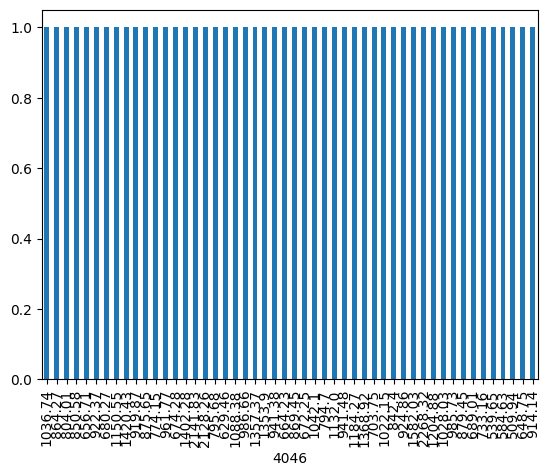

In [52]:
avocado['4046'].head(50).value_counts().plot(kind='bar')
plt.show()

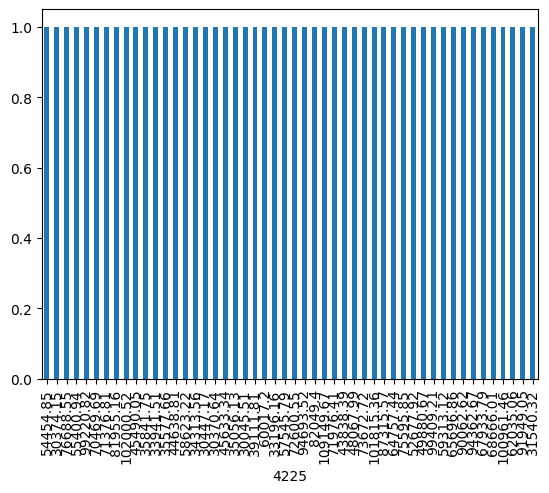

In [53]:
avocado['4225'].head(50).value_counts().plot(kind='bar')
plt.show()

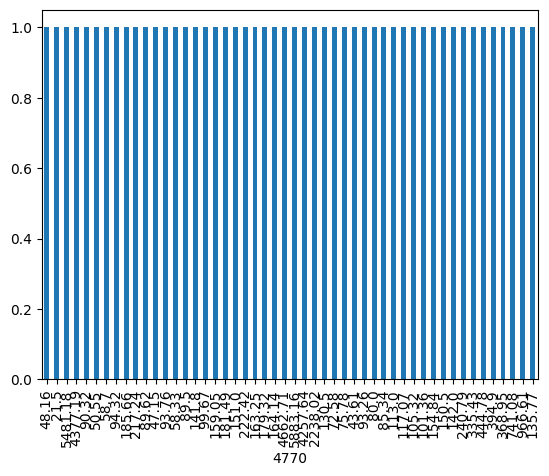

In [54]:
avocado['4770'].head(50).value_counts().plot(kind='bar')
plt.show()

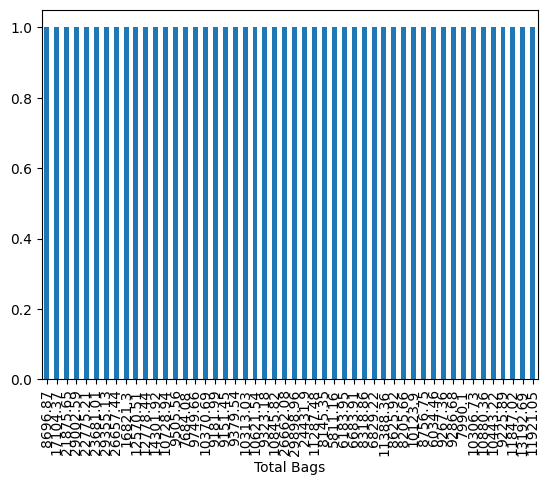

In [56]:
avocado['Total Bags'].head(50).value_counts().plot(kind='bar')
plt.show()

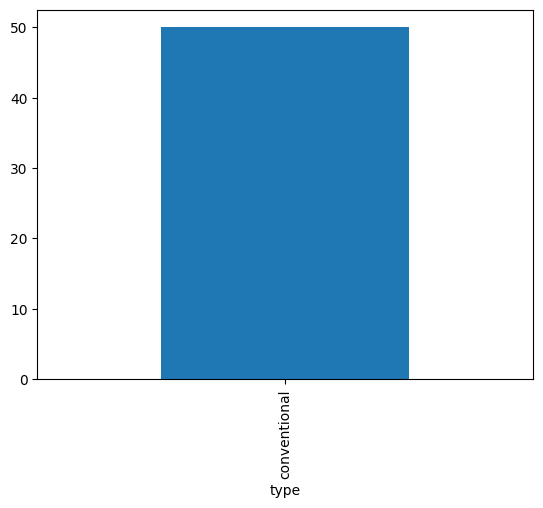

In [57]:
avocado['type'].head(50).value_counts().plot(kind='bar')
plt.show()

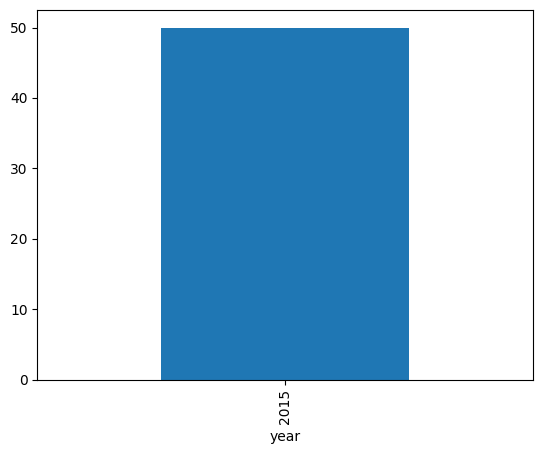

In [58]:
avocado['year'].head(50).value_counts().plot(kind='bar')
plt.show()

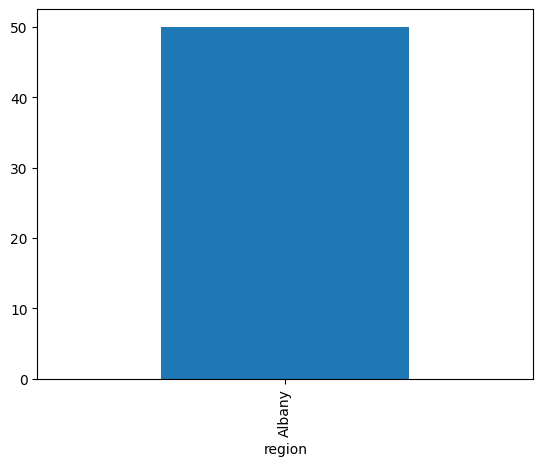

In [59]:
avocado['region'].head(50).value_counts().plot(kind='bar')
plt.show()